In [1]:
text="Pawel"
f'hi {text}'

'hi Pawel'

In [2]:
import numpy as np

In [238]:
x = np.linspace(0, 1, 200)
y = 2*(x-0.5)**3 + 0.5 + np.random.normal(scale=0.05, size=x.shape)

In [7]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

In [8]:
print(p)

       3         2
2.191 x - 3.272 x + 1.616 x + 0.2316


In [9]:
import matplotlib.pyplot as plt

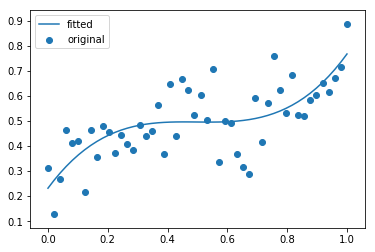

In [11]:
plt.scatter(x, y, label="original")
plt.plot(x, p(x), label="fitted")
plt.legend()
plt.show()

In [13]:
from bokeh.plotting import figure, show

In [93]:
f = figure(title="plotting", 
           x_axis_label="x", 
           y_axis_label="y")

In [94]:
f.line(x, y_hat, line_alpha=0.6)
f.circle(x, y, fill_alpha=0.6, radius=0.01, color='red')
show(f)

In [179]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

In [84]:
jobs = [("scale", StandardScaler()), 
        ("polynomial_fit", PolynomialFeatures(degree=4, include_bias=False)),
        ("model", LinearRegression())]

In [221]:
jobs = [("scale", StandardScaler()), 
        ("polynomial_fit", PolynomialFeatures(degree=10, include_bias=False)),
        ("model", Ridge())]

In [222]:
pipe = Pipeline(jobs)

In [223]:
alphas = [10**i for i in range(-4, 4)]
degrees = np.arange(1, 10)

In [229]:
params = [
    {
        "model": [Ridge()],
        "polynomial_fit__degree": degrees,
        "model__alpha": alphas,
        "model__fit_intercept": [True, False],
        "model__normalize": [True, False]
    }
]

In [240]:
grid = GridSearchCV(pipe, params, cv=4)
grid.fit(x[:, None], y)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_fit', PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)), ('model', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'model': [Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)], 'polynomial_fit__degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]), 'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'model__fit_intercept': [True, False], 'model__normalize': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [231]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_fit', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('model', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001))])

In [232]:
grid_results = grid.cv_results_
print(grid_results["mean_test_score"].max())

0.2633329276780141


In [233]:
for param, train_score, test_score in zip(grid_results["params"], grid_results["mean_test_score"], grid_results["mean_train_score"]):
    print(param, ": \ntrain_score: {:.5f},test_score: {:.5f}".format(train_score, test_score))

{'model': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__normalize': True, 'polynomial_fit__degree': 1} : 
train_score: 0.01332,test_score: 0.60347
{'model': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__normalize': True, 'polynomial_fit__degree': 2} : 
train_score: -2.35398,test_score: 0.65142
{'model': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001), 'model__alpha': 0.0001, 'model__fit_intercept': True, 'model__normalize': True, 'polynomial_fit__degree': 3} : 
train_score: 0.09172,test_score: 0.71378
{'model': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver=

/Users/aspiela/anaconda/envs/p37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [196]:
np.set_printoptions(precision=4, suppress=True)

In [167]:
pipe.fit(x[:, None], y[:, None])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_fit', PolynomialFeatures(degree=10, include_bias=False, interaction_only=False)), ('model', Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [176]:
alpha_list = [0., 0.01, 0.1, 1, 10]
r2_scores = {}
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
for a in alpha_list:
    jobs = [("scale", StandardScaler()), 
            ("polynomial_fit", PolynomialFeatures(degree=10, include_bias=False)),
            ("model", Ridge(alpha=a))]
    pipe = Pipeline(jobs)
    pipe.fit(X_train[:, None], y_train[:, None])
    y_hat = pipe.predict(X_test[:, None])
    r2_scores[str(a)] = "r2={:.4f}, mse={:.4f}".format(
                            pipe.score(y_test[:, None], y_hat), 
                            mean_squared_error(y_test[:, None], y_hat))
print(r2_scores)

{'0.0': 'r2=0.1227, mse=0.0024', '0.01': 'r2=0.1470, mse=0.0022', '0.1': 'r2=0.1662, mse=0.0021', '1': 'r2=0.1675, mse=0.0020', '10': 'r2=0.1459, mse=0.0020'}


In [177]:
import pprint as pp
pp.pprint(r2_scores)

{'0.0': 'r2=0.1227, mse=0.0024',
 '0.01': 'r2=0.1470, mse=0.0022',
 '0.1': 'r2=0.1662, mse=0.0021',
 '1': 'r2=0.1675, mse=0.0020',
 '10': 'r2=0.1459, mse=0.0020'}


In [208]:
jobs = [("scale", StandardScaler()), 
        ("polynomial_fit", PolynomialFeatures(degree=3, include_bias=False)),
        ("model", Ridge(alpha=0.1, normalize=True))]
pipe = Pipeline(jobs)
pipe.fit(x[:, None], y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial_fit', PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)), ('model', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001))])

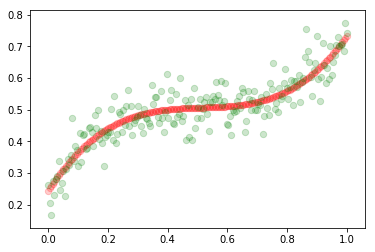

In [241]:
plt.scatter(x, np.squeeze(grid.predict(x[:, None])), c='r', alpha=0.2, s=40)
plt.scatter(x, y, c='g', alpha=0.2, s=40)
plt.show()

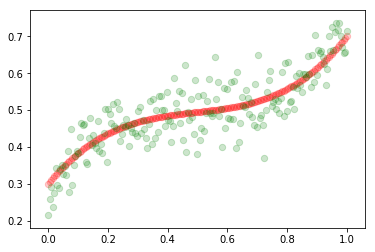

In [209]:
plt.scatter(x, np.squeeze(pipe.predict(x[:, None])), c='r', alpha=0.2, s=40)
plt.scatter(x, y, c='g', alpha=0.2, s=40)
plt.show()

In [169]:
y_hat = np.squeeze(pipe.predict(x[:, None]))
rms_error = 0.
for y_touple in zip(y, y_hat):
    rms_error += np.subtract(*y_touple)**2
rms_error = rms_error/len(y)
print(f'rms_error = {rms_error}')

rms_error = 0.009195605935748457


In [89]:
pipe.predict([[5.]])

array([[1296.97459923]])

In [109]:
from sklearn.metrics import mean_squared_error, r2_score

In [108]:
mean_squared_error(y, y_hat)

0.010088033577657413

In [151]:
r2_score(y, y_hat)

0.6297626491262998

In [115]:
pipe.score(x[:, None], y)

0.5333998360055159

In [144]:
cross_val_score(pipe, x[:, None], y, cv=10).mean()

-0.7602911889184321

In [116]:
import seaborn as sns

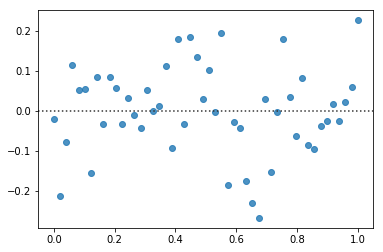

In [117]:
sns.residplot(x, y)
plt.show()

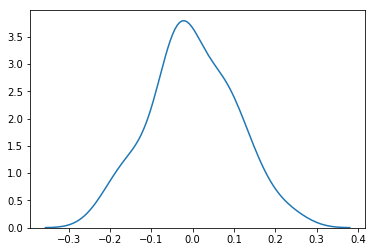

In [124]:
sns.distplot(y-y_hat, hist=False)
plt.show()

In [125]:
import pandas as pd

In [126]:
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'

In [127]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [128]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [132]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [138]:
print(cross_val_score.__doc__)

Evaluate a score by cross-validation

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like
        The data to fit. Can be for example a list, or an array.

    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.

    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

        - None, 

In [234]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [235]:
x = np.linspace(-3, 3, 10)
def f(intercept, slope):
    plt.plot(x, intercept + x*slope)

In [236]:
interact(f, intercept=(-3, 3, 1), slope=(-1, 1, 0.1))

interactive(children=(IntSlider(value=0, description='intercept', max=3, min=-3), FloatSlider(value=0.0, descr…

<function __main__.f(intercept, slope)>